In [1]:
# pip install -U imbalanced-learn scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle
from imblearn.over_sampling import SMOTE


In [3]:


# Load the training data
train_data_path = 'fraudTrain.csv'  
train_df = pd.read_csv(train_data_path)

# Load the testing data
test_data_path = 'fraudTest.csv'  
test_df = pd.read_csv(test_data_path)

# Display the first few rows of the training data
print("Training Data:")
display(train_df.head())

# Display the first few rows of the testing data
print("\nTesting Data:")
display(test_df.head())


Training Data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



Testing Data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Basic structure
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
print("\nFeature Data Types:\n", train_df.dtypes)

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:\n", train_df.describe())

# Summary of categorical features
print("\nSummary of Categorical Features:\n", train_df.describe(include='object'))

# Missing values
print("\nMissing Values:\n", train_df.isnull().sum())

# Number of unique values in each feature
print("\nUnique Values:\n", train_df.nunique())

# Distribution of the target variable
print("\nDistribution of Target Variable 'is_fraud':\n", train_df['is_fraud'].value_counts(normalize=True))

# Correlation matrix
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
print("\nCorrelation Matrix:\n", train_df[numeric_columns].corr())

# Set the aesthetic style of the plots
sns.set_style('whitegrid')




Training Data Shape: (1296675, 23)
Testing Data Shape: (555719, 23)

Feature Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Summary Statistics for Numerical Features:
          Unnamed: 0        cc_num           amt           zip           lat  \
count  1.2966

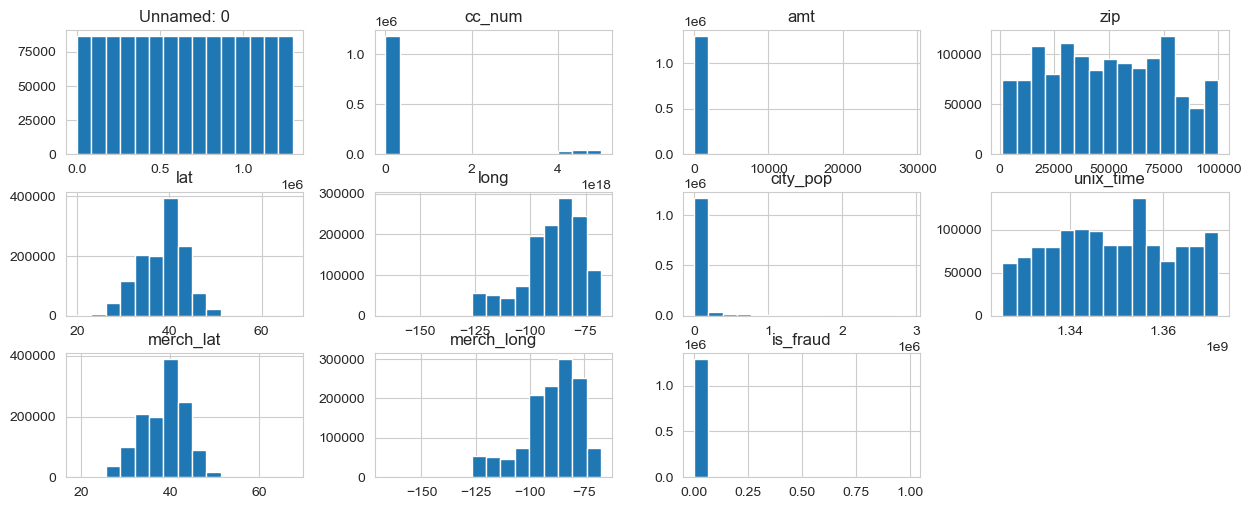

In [5]:
# Histograms for numerical features
train_df.hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.show()



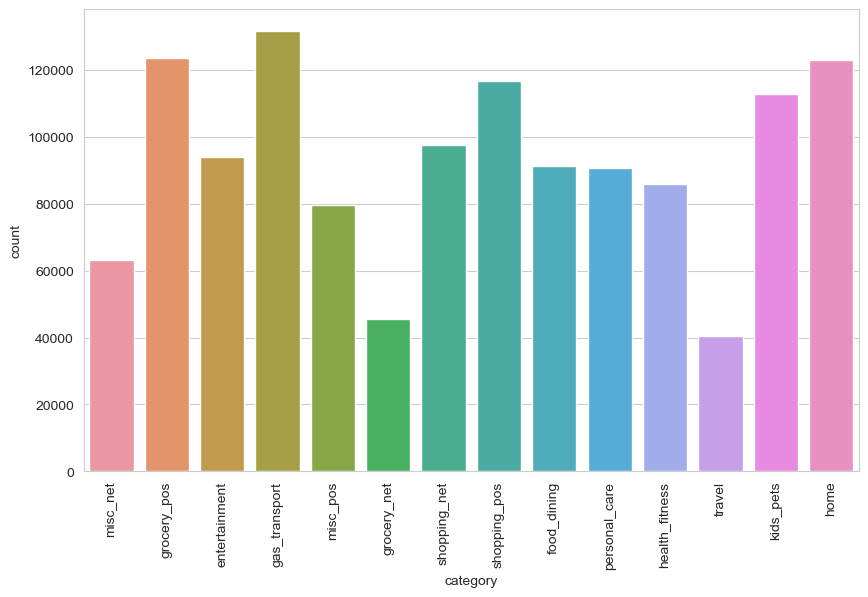

In [6]:
#Bar chart for categorical features - you can choose specific categorical features to visualize
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=train_df)
plt.xticks(rotation=90)
plt.show()



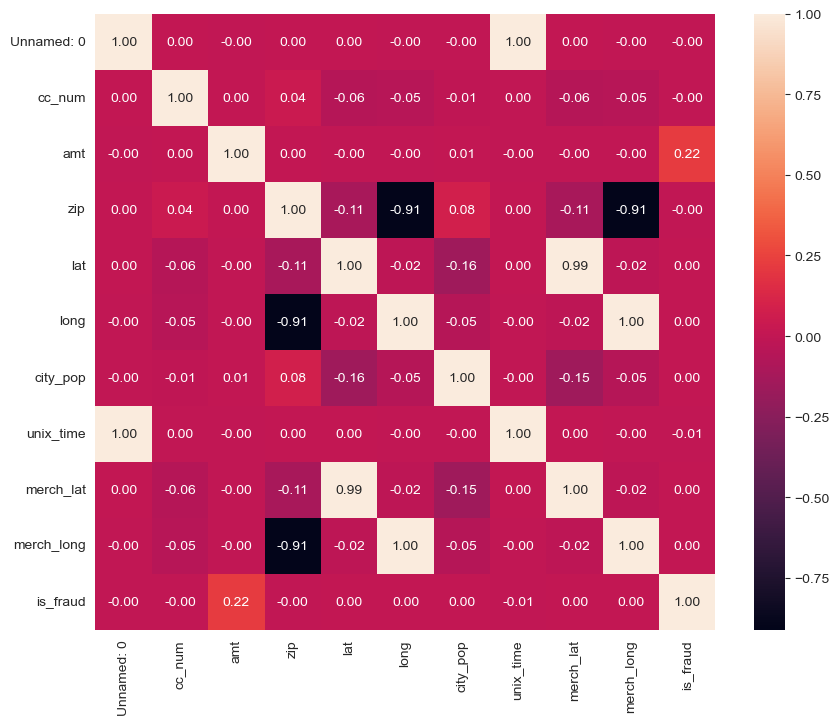

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numeric_columns].corr(), annot=True, fmt=".2f")
plt.show()



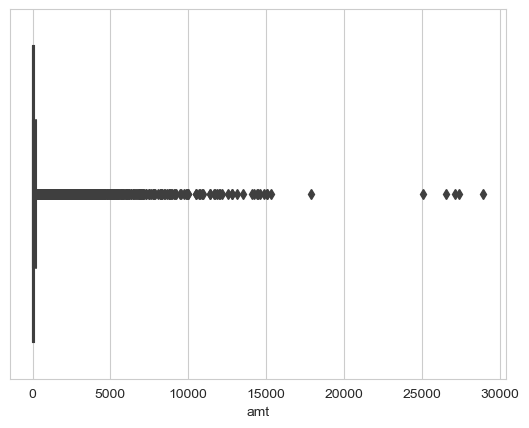

In [8]:
#Boxplot to check for outliers - choose a specific feature to check for outliers
sns.boxplot(x=train_df['amt'])
plt.show()

In [9]:
# Feature Engineering

# Convert to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

# Extract features
train_df['transaction_hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek
train_df['age'] = (train_df['trans_date_trans_time'] - train_df['dob']).dt.days // 365

# Drop original datetime columns to avoid redundancy
train_df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [10]:
# Preprocessing

# Encode categorical variables as necessary (Example)
encoder = LabelEncoder()
train_df['gender'] = encoder.fit_transform(train_df['gender'])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age']
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


In [11]:
from sklearn.preprocessing import LabelEncoder

# Updated list with all categorical columns, excluding unique identifiers and directly numerical columns
categorical_cols = ['merchant', 'category', 'gender', 'state', 'first', 'last', 'street', 'city', 'job']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])

# After encoding, drop any columns that are not useful for the model
columns_to_drop = ['trans_num', 'Unnamed: 0']  # Add or remove columns based on your dataset
train_df = train_df.drop(columns=columns_to_drop)

from imblearn.over_sampling import SMOTE

# Prepare features and target variable, ensuring to exclude any columns not needed for modeling
X = train_df.drop('is_fraud', axis=1)
y = train_df['is_fraud']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [12]:
# # Initialize LabelEncoders for each categorical column
# label_encoders = {col: LabelEncoder() for col in ['merchant', 'category', 'gender', 'state', 'first', 'last', 'street', 'city', 'job']}

# # Apply Label Encoding to each categorical column and store mappings
# mappings = {}
# for col, encoder in label_encoders.items():
#     train_df[col] = encoder.fit_transform(train_df[col])
#     mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# # Optionally, print mappings to verify
# for col, mapping in mappings.items():
#     print(f"{col} Mapping:", mapping)

# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# # Prepare features and target variable for modeling
# X = train_df.drop('is_fraud', axis=1)
# y = train_df['is_fraud']

# # Apply SMOTE for handling imbalanced data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

In [13]:

# Preparation of data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Size of X_test_scaled:", X_test_scaled.shape)


# Save the fitted scaler to a file for later use in preprocessing new input data
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


Size of X_test_scaled: (515668, 21)


In [14]:
log_clf = LogisticRegression(max_iter=10, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
nb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(n_neighbors=5)


In [15]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('nb', nb_clf), ('knn', knn_clf)],
    voting='soft'  # Try 'hard' as well
)
voting_clf.fit(X_train_scaled, y_train)


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10, random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [16]:
y_pred = voting_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.994800918420379
Confusion Matrix:
 [[255170   2016]
 [   665 257817]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    257186
           1       0.99      1.00      0.99    258482

    accuracy                           0.99    515668
   macro avg       0.99      0.99      0.99    515668
weighted avg       0.99      0.99      0.99    515668



In [17]:


# Assuming 'voting_clf' is your trained model
with open('fraud_model.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)

In [18]:
# List unique merchants
unique_merchants = train_df['merchant'].unique()
print("Unique Merchants:")
print(unique_merchants)

# List unique categories
unique_categories = train_df['category'].unique()
print("\nUnique Categories:")
print(unique_categories)

# List unique states
unique_states = train_df['state'].unique()
print("\nUnique States:")
print(unique_states)

Unique Merchants:
[514 241 390 360 297 607 534 107 250 563 543 304 394 308  42 557 379 409
 331 570  29 231 324 467 387 351 130  82 352 454 311 627  21  17 268 239
 225 229 442  92 265 381 329 146 548 602 443  86 468 479 272 648 309 298
 117 194 589 271 403 436 153 270 172 237 392 280 217 119 610 466 502   8
 480 208  99 625 678 650 645  47 439  77 444 472 363 108 273 147 554 549
 669 483 162 349 175 421 300 595 198   4 210 522 681 657 245 494 332 585
 255 149 414 498 485 370  32 510  55 157 359 174 463 181 508  70 399  88
 186 196 475 425 431 327 346 328 597 491 450 378 183  67  73 691 256  81
  48 677  83 316 588 303 173 487 291  43 103   3 193 417  24  94 384 411
 560 484 608 659 140 395 626 342 523 664  12 462 295 121 118 504 635  53
 632 427 365 136 594 524 106 623  93 285 499 488 476 647 605 358  25 142
 176 638 400 528 212 590 539  57  18 533 559 404 224 536 518 284  52 236
 267 631 616 313 156 426 571 206 336 247  20 415 661  13  63 133 389  87
 410 604 459 473  51 209 137 125 

In [19]:
# !streamlit run fraud_detection_app.ipynb